In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime

# 주식정보
from pandas_datareader import data

### 데이터를 읽어온다.

In [2]:
drink = pd.read_csv("data/drinks.csv")
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


- country : 국가정보
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_liters_of_pure_alcohol : 총 알콜 소비량
- contient : 대륙정보


In [3]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


데이터를 확인할때 데이터타입을 잘 확인하자.

### 각 컬럼의 상관관계를 살펴봅시다.

In [4]:
# beer_servings와 wine_servings 두 특성 간의 상관계수를 계산한다./
# pearson은 상관관계를 계산하는 함수
corr = drink[["beer_servings", "wine_servings"]].corr(method="pearson")
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
# 여러 특성간의 상관 관계를 확인한다.
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 
        'total_litres_of_pure_alcohol']

corr = drink[cols].corr(method='pearson')
corr


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


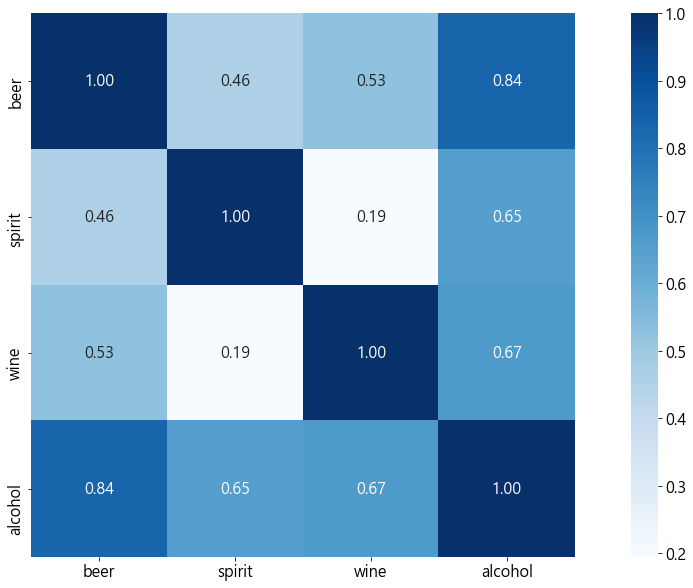

In [6]:
# heatmap
# 밝은 쪽은 상관관계가 높고, 어두운 쪽은 상관관계가 낮다.

# 표시할 컬럼 이름 목록
cols_view = ["beer", "spirit", "wine", "alcohol"]  # 넣은 순서대로 표시가 되므로 주의.

# 첫번째 : 상관계수 값들
# xticklabels : x축 칼럼 이름
# yticklabels : y축 칼럼 이름
# squere : True를 넣어주면 정사각형 모양으로 나온다.
# annot  : True를 넣어주면 정사각형 중앙에 값이 표시된다.
# fmt : 소수점 양식
# cmap : 색상값. 
sns.heatmap(corr.values, xticklabels=cols_view, yticklabels=cols_view, square=True,
           annot=True, fmt='.2f', cmap="Blues")

plt.show()
# https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/ 참조

결과 데이터가 너무 안좋으면 상관관계가 낮은 것을 한번 제거해보면 도움이 될 수 도 있다.
노이즈 컬럼이 있는지도 확인가능

### 결측치 처리

In [7]:
drink["continent"].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [8]:
# contient 에 23개의 결측가 있다고 나오지만 사실은 NA라는 문자열이 있다.
# 결측치로 측정된 부분을 NA라는 문자열로 변경한다.
drink['continent'].fillna('NA', inplace=True)
drink.isna().sum()


country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [9]:
# 결측치를 채운 데이터를 저장한다.
drink.to_csv('data/drink_test.csv')


In [10]:
test_df = pd.read_csv('data/drink_test.csv')
test_df.isna().sum()


Unnamed: 0                       0
country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

이러한 상황을 반드시 체크해줘야한다!! NA라는 글자가 들어가는지 아닌지

In [11]:
# 대륙별 수를 구해본다.
drink["continent"].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

### 조사 대상에 대한 대륙별 비율을 확인한다.

In [12]:
# 그래프를 그리기 위한 데이터를 준비한다.
# 대륙별 국가 수
fraces = drink["continent"].value_counts()
fraces

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

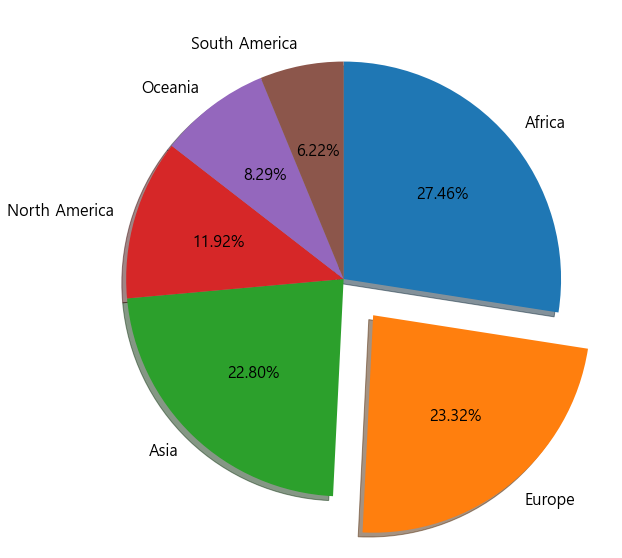

In [13]:
# 대륙이름
names = ["Africa", "Europe", "Asia", "North America", "Oceania", "South America"]

# 파이조각이 튀어나올 비율
explode = 0,0.215,0,0,0,0 # 반지름 크기의 비율. 

# 첫번째 : 데이터
# labels : 각 파이의 이름
# autopct : 파이 내에 퍼센트가 표시될 양식. 생략하면 퍼센트가 표시되지 않는다.
# shadow : True를 주면 그림자가 생긴다.
# explode : 튀어나올 조각 설정(비율)
# startangle : 시작 각도 값. 3시 방향이 0, 시계 반대방향으로 적용
# counterclock : 원을 그릴 방향 True가 기본은 시계 반대방향

plt.pie(fraces, labels=names, autopct="%.2f%%", shadow=True , explode=explode,counterclock=False, startangle=90)
plt.show()

- 대륙별 spirit_servings의 평균, 최소, 최대, 총합을 구한다.
- 전체 평균보다 많은 알콜을 섭취하는 대륙을 구한다.
- 평균 beer_servings가 가장 높은 대륙을 구한다.

In [14]:
# 대륙별 spirit_servings의 평균,최소,최대,총합?
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [15]:
drink.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [16]:
drink["spirit_servings"].value_counts()

0      23
1       9
3       8
2       7
100     4
       ..
131     1
145     1
147     1
258     1
84      1
Name: spirit_servings, Length: 109, dtype: int64

In [17]:
#평균
drink.groupby("continent")["spirit_servings"].mean()

continent
AF     16.339623
AS     60.840909
EU    132.555556
NA    165.739130
OC     58.437500
SA    114.750000
Name: spirit_servings, dtype: float64

In [18]:
#최소
drink.groupby("continent")["spirit_servings"].min()

continent
AF     0
AS     0
EU     0
NA    68
OC     0
SA    25
Name: spirit_servings, dtype: int64

In [19]:
# 최대
drink.groupby("continent")["spirit_servings"].max()

continent
AF    152
AS    326
EU    373
NA    438
OC    254
SA    302
Name: spirit_servings, dtype: int64

In [20]:
# 총합
drink.groupby("continent")["spirit_servings"].sum()

continent
AF     866
AS    2677
EU    5965
NA    3812
OC     935
SA    1377
Name: spirit_servings, dtype: int64

전체 평균보다 많은 알콜을 섭취하는 대륙을 구한다.

In [21]:
a = drink.groupby("continent")["total_litres_of_pure_alcohol"].mean().mean()
alcoholic = drink.groupby("continent")["total_litres_of_pure_alcohol"].mean() > a
idx = drink.groupby("continent")["total_litres_of_pure_alcohol"].mean()[alcoholic].index
for i in idx:
    print(f"{i}")

EU
NA
SA


평균 beer_servings가 가장 높은 대륙을 구한다.

In [22]:
a = drink.groupby("continent")["beer_servings"].mean().sort_values(ascending=False)
con = a.index[0]
print(f"평균적으로 맥주를 가장 많이 마시는 대륙은 {con}")

평균적으로 맥주를 가장 많이 마시는 대륙은 EU


---

In [23]:
# 대륙별로 그룹을 묶어 spririt_servings를 가져온다.
a1 = drink.groupby('continent')['spirit_servings']


In [24]:
r1 = a1.mean()
r2 = a1.min()
r3 = a1.max()
r4 = a1.sum()

display(r1)
display(r2)
display(r3)
display(r4)


continent
AF     16.339623
AS     60.840909
EU    132.555556
NA    165.739130
OC     58.437500
SA    114.750000
Name: spirit_servings, dtype: float64

continent
AF     0
AS     0
EU     0
NA    68
OC     0
SA    25
Name: spirit_servings, dtype: int64

continent
AF    152
AS    326
EU    373
NA    438
OC    254
SA    302
Name: spirit_servings, dtype: int64

continent
AF     866
AS    2677
EU    5965
NA    3812
OC     935
SA    1377
Name: spirit_servings, dtype: int64

In [25]:
# 난 한번에 구하고 싶다.
# agg 함수 : 구하고자 하는 통계값들을 나열해 주면 한번에 가져온다.
# 통계함수의 이름을 문자열로 설정해준다.
a1.agg(["mean", "min", "max", "sum"])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


### 전체 평균보다 많은 알콜을 섭취하는 대륙을 구한다.

In [26]:
# 알콜 섭취량 전체 평균을 구한다.
total_mean = drink["total_litres_of_pure_alcohol"].mean()
total_mean

4.717098445595855

In [27]:
# 대륙별 알콜 섭취량 평균
a1 = drink.groupby("continent")["total_litres_of_pure_alcohol"]
continent_mean = a1.mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [28]:
# 전체 평균보다 높은 대륙만 가져온다.
a1 = continent_mean >= total_mean
continent_over_mean = continent_mean[a1]
continent_over_mean

continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### 평균 Beer_servings가 가장 높은대륙을 구한다.

In [29]:
# 대륙별 beer_servings 평균을 구한다.
a1 = drink.groupby("continent")["beer_servings"]
a2 = a1.mean()
a2

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [30]:
# 평균 beer_servings의 값을 기준으로 내림차순 정렬한다.
a3 = a2.sort_values(ascending=False)
print(f"대륙명 : {a3.index[0]}")
print(f"평균값 : {a3[0]}")

대륙명 : EU
평균값 : 193.77777777777777


In [31]:
# 새로운 함수!!
# 가장 큰 값을 가지고 있는 인덱스를 추출할 수 있는 함수
a4 = a2.idxmax()

print(f"대륙명 : {a4}")
print(f"평균값 : {a2[a4]}")

대륙명 : EU
평균값 : 193.77777777777777


### 대륙별 spirit_servings의 평균, 최소, 최대, 합계값을 시각화

In [32]:
a1 = drink.groupby("continent")["spirit_servings"]
result = a1.agg(["mean", "min", "max","sum" ])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


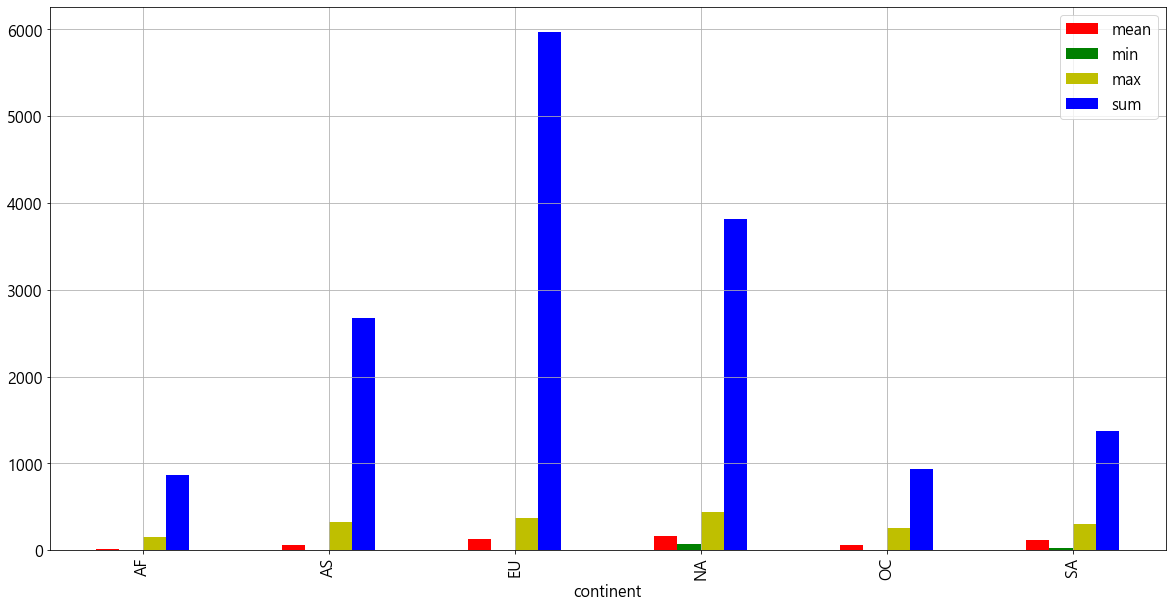

In [33]:
result.plot.bar(color=["r", "g", "y", "b"])
plt.grid()
plt.show()

### 대륙별 total_litres_of_pure_alcohol 평균을 시각화한다.

In [34]:
# 각 대륙별 total_litres_of_pure_alcohol의 평균을 구한다.
continent_mean = drink.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [35]:
# 전체 평균을 구해 그래프에 표시할거임
total_mean = drink["total_litres_of_pure_alcohol"].mean()
continent_mean["mean"] = total_mean
continent_mean
# 시리즈는 열이 없기 때문에 행에 추가된다.

continent
AF      3.007547
AS      2.170455
EU      8.617778
NA      5.995652
OC      3.381250
SA      6.308333
mean    4.717098
Name: total_litres_of_pure_alcohol, dtype: float64

In [49]:
# x축에 들어갈 값(대륙의 수)
x_pos = np.arange(len(continent_mean))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

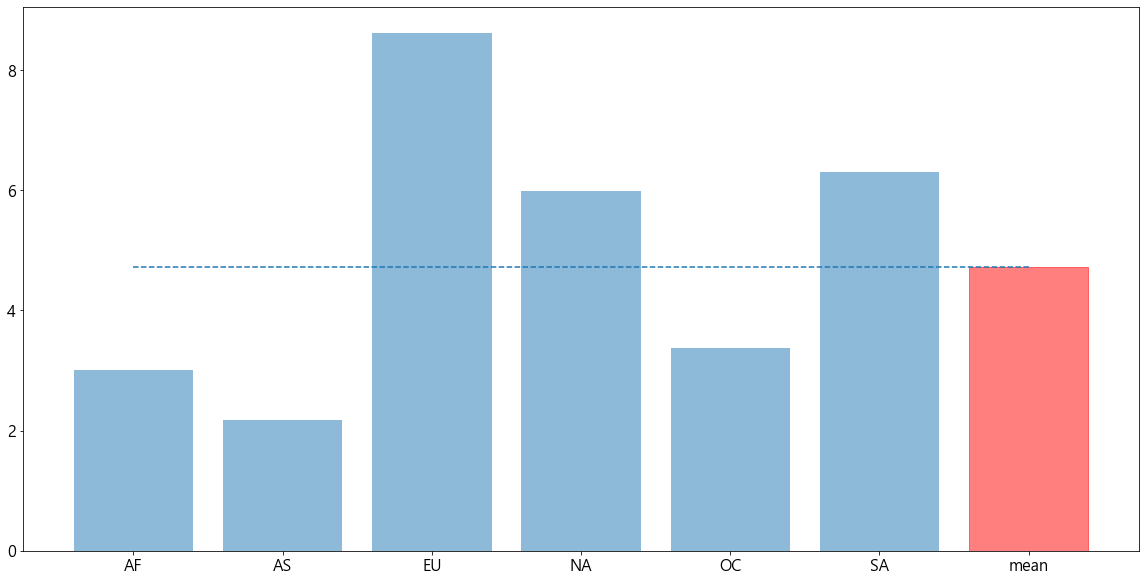

In [50]:
bar_list = plt.bar(x_pos, continent_mean.values, align="center", alpha=0.5)

# 제일 마지막 막대의 색상을 붉은 색으로 바꾼다. (bar_list에 각 막대의 객체가 생성됨)
bar_list[-1].set_color("r")

# 평균값을 기반으로 선을 그린다.
# 첫번째 : x축 위치(a1에서 a2까지)
# 두번째 : y축 위치 (a1에서 a2까지)
# 세번째 : 선의 스타일
plt.plot([0, 6], [total_mean, total_mean], "--")

# x축에 대륙별 이름을 설정해주기
# xticks
# 첫번째 : 막대그래프 인덱스가 들어있는 요소, 각 막대에 적용할 이름

plt.xticks(x_pos, continent_mean.index)

plt.show()

bar_list를 생성해서 각 막대의 객체를 제어할 수 있따

### 한국인들은 얼마나 술을 독하게 마실까...

In [39]:
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [40]:
# 전체 술 소비량을 구한다.
total_servings = drink["beer_servings"] + drink["spirit_servings"] + drink["wine_servings"]
total_servings

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [41]:
# 데이터 프레임에 추가한다.
drink["total_servings"] = total_servings
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [42]:
# 술 소비량 대비 알콜 비율을 계산한다.
a1 = drink["total_litres_of_pure_alcohol"] / drink["total_servings"]
# 계산결과에 결측치가 있다는 것은 계산 자체가 성립되지 않았다는 뜻이다.
# 이 경우에는 total_servings가 0인 경우 계산 성립이 안된 상황이다.
# total_servings가 0이라는것은 술 섭취량 자체가 없는 상황이라 알콜 섭취량도 0이고
# 이에 비율도 0이 되므로 0으로 채워준다.
a1.fillna(0, inplace=True)

drink["alcohol_rate"] = a1
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [43]:
# 국가와 알콜 비율을 추출한다.
country_with_rate = drink[["country", "alcohol_rate"]]
country_with_rate

,country,alcohol_rate
0,Afghanistan,0.000000
1,Albania,0.017818
2,Algeria,0.017949
3,Andorra,0.017842
4,Angola,0.018495
...,...,...
188,Venezuela,0.017661
189,Vietnam,0.017544
190,Yemen,0.016667
191,Zambia,0.045455


In [44]:
# alcohol_rate를 기준으로 내림차순 정렬을 한다.
country_with_rate.sort_values(by="alcohol_rate", ascending=False, inplace=True)
country_with_rate

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


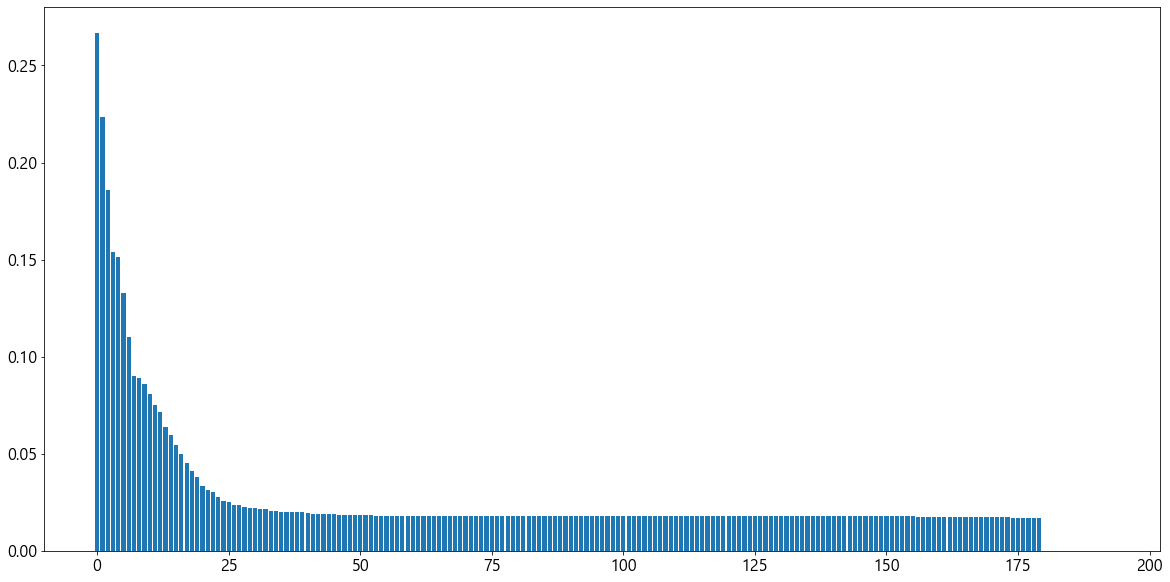

In [45]:
# x범위 설정
x_pos = np.arange(len(country_with_rate))
# y좌표 설정
rank = country_with_rate["alcohol_rate"]

plt.bar(x_pos, rank)
plt.show()

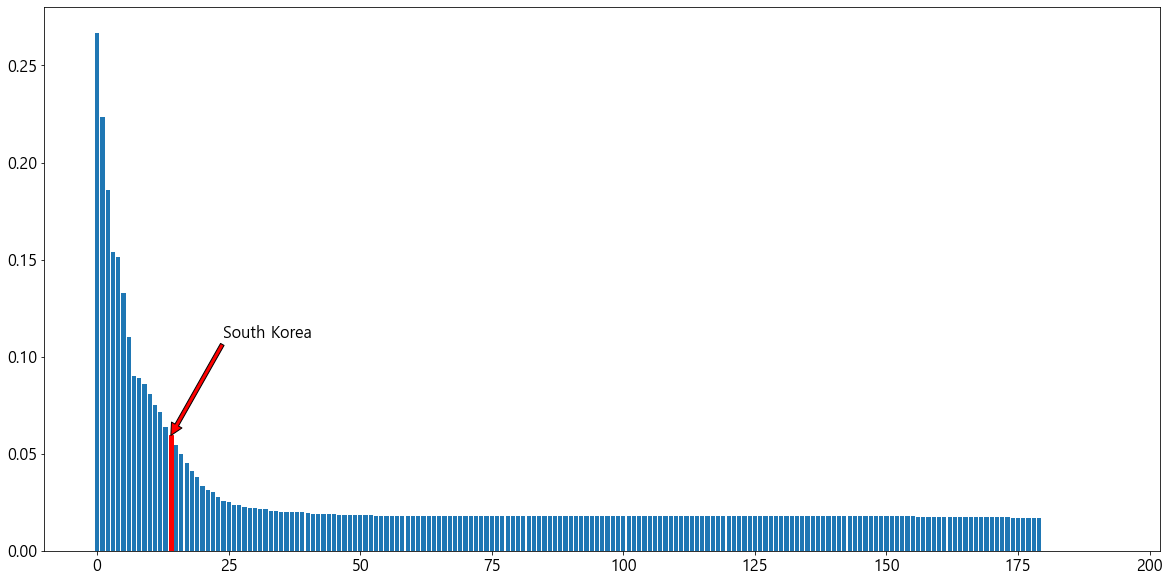

In [46]:
bar_list = plt.bar(x_pos, rank)

# 한국이 몇번째 막대그래프인지 확인
# 국가 이름들을 추출한다.
names = country_with_rate["country"].tolist()
korean_idx = names.index("South Korea")
# 리스트에 .index를 하면 값이 몇번 인덱스인지 알 수 있다.

# 화살표 관련 설정
arrow_dict = {
    "facecolor" : "red",
}


# 한국 위치를 표시
# 어노테이션 설정
# 어노테이션은 무언가에 대한 표시를 의미한다.
# 그래프에 대한 어노테이션은 문자열과 화살표로 구성된다.
# 첫번째 : 표시할 문자열
# xy : 어노테이션의 위치(가로, 세로)
# xytext  : 어노테이션의 문자열의 위치
# arrowprops : 화살표 설정. 생략하면 화살표가 나타나지 않는다.
bar_list[korean_idx].set_color("r")

plt.annotate("South Korea", xy=(korean_idx, rank.values[korean_idx]),
             xytext= (korean_idx  +10,rank.values[korean_idx]+0.05),
            arrowprops = arrow_dict, )
# plt.annotate("South Korea", xy=(korean_idx, rank.iloc[korean_idx]))



plt.show()

데이터 시각화, 특히 그래프 그리는 방법은 "데이터사이언스스쿨"이나 각종 책 참조할것